<a href="https://colab.research.google.com/github/wtfoong/ODL_assignment/blob/main/ODL_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#install new ver of panda profilling
!pip install pandas_profiling --upgrade

In [ ]:
#imports
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
import math
import numpy as np
import pandas as pd
import seaborn as sns

#### Dataset Exploration and preprocessing

In [ ]:
#Mounting Google Drive to google Colab
from google.colab import drive
drive.mount('/drive')

Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).


In [ ]:
#connecting dataset
path = '/drive/MyDrive/ODL assignment/diabetes_binary_5050split_health_indicators_BRFSS2015.csv' 
df = pd.read_csv(path)

In [ ]:
#read first 5 row of data
df.head()

In [ ]:
#read last 5 rows 
df.tail()

In [ ]:
#see all columns
df.columns

In [ ]:
#see dataset information
df.info()

In [ ]:
#know number of rows and columns
df.shape

In [ ]:
#get mean and other stuff of all columns
df.describe()

In [ ]:
#get a detailed report for all columsn in the dataset
pReport = ProfileReport(df)
pReport

In [ ]:
#check for missing data
df.isnull().sum().any()

In [ ]:
# view unique values in all columns
unique_values = {}
for col in df.columns:
    unique_values[col] = df[col].value_counts().shape[0]

pd.DataFrame(unique_values, index=['unique value count']).transpose()


In [ ]:
# chk for outliers in dataset using box plot, columns chosen to check are columns with more than 2 unique values
plt.figure(figsize = (15,15))
for i,col in enumerate(['BMI', 'GenHlth', 'MentHlth', 'PhysHlth', 'Age','Education', 'Income']):
    plt.subplot(4,2,i+1)
    sns.boxplot(x = col, data = df ,palette='Set2')
plt.show()

In [ ]:
#Replacing 0 into Non-Diabetic and 1 into Diabetic in a new Diabetes_str column
df["Diabetes_str"]= df["Diabetes_binary"].replace({'0':"Not Diabetic",'1':"Diabetic"})

In [ ]:
# to show categorical values better
df2 = df.copy() 

In [ ]:
# help to show relations between the different features better, all explaination for columns are from author of dataset
df2.Age[df2['Age'] == 1] = '18 - 24'
df2.Age[df2['Age'] == 2] = '25 - 29'
df2.Age[df2['Age'] == 3] = '30 - 34'
df2.Age[df2['Age'] == 4] = '35 - 39'
df2.Age[df2['Age'] == 5] = '40 - 44'
df2.Age[df2['Age'] == 6] = '45 - 49'
df2.Age[df2['Age'] == 7] = '50 - 54'
df2.Age[df2['Age'] == 8] = '55 - 59'
df2.Age[df2['Age'] == 9] = '60 - 64'
df2.Age[df2['Age'] == 10] = '65 - 69'
df2.Age[df2['Age'] == 11] = '70 - 74'
df2.Age[df2['Age'] == 12] = '75 - 79'
df2.Age[df2['Age'] == 13] = '80 or older'

df2.Diabetes_binary[df2['Diabetes_binary'] == 0] = 'Not Diabetic'
df2.Diabetes_binary[df2['Diabetes_binary'] == 1] = 'Diabetic'

df2.HighBP[df2['HighBP'] == 0] = 'Normal BP'
df2.HighBP[df2['HighBP'] == 1] = 'High BP'

df2.HighChol[df2['HighChol'] == 0] = 'Normal Cholesterol'
df2.HighChol[df2['HighChol'] == 1] = 'High Cholesterol'

df2.CholCheck[df2['CholCheck'] == 0] = 'No Cholesterol Check in 5 Years'
df2.CholCheck[df2['CholCheck'] == 1] = 'Cholesterol Check in 5 Years'

df2.Smoker[df2['Smoker'] == 0] = 'No'
df2.Smoker[df2['Smoker'] == 1] = 'Yes'

df2.Stroke[df2['Stroke'] == 0] = 'No'
df2.Stroke[df2['Stroke'] == 1] = 'Yes'

df2.HeartDiseaseorAttack[df2['HeartDiseaseorAttack'] == 0] = 'No'
df2.HeartDiseaseorAttack[df2['HeartDiseaseorAttack'] == 1] = 'Yes'

df2.PhysActivity[df2['PhysActivity'] == 0] = 'No'
df2.PhysActivity[df2['PhysActivity'] == 1] = 'Yes'

df2.Fruits[df2['Fruits'] == 0] = 'No'
df2.Fruits[df2['Fruits'] == 1] = 'Yes'

df2.Veggies[df2['Veggies'] == 0] = 'No'
df2.Veggies[df2['Veggies'] == 1] = 'Yes'

df2.HvyAlcoholConsump[df2['HvyAlcoholConsump'] == 0] = 'No'
df2.HvyAlcoholConsump[df2['HvyAlcoholConsump'] == 1] = 'Yes'

df2.AnyHealthcare[df2['AnyHealthcare'] == 0] = 'No'
df2.AnyHealthcare[df2['AnyHealthcare'] == 1] = 'Yes'

df2.NoDocbcCost[df2['NoDocbcCost'] == 0] = 'No'
df2.NoDocbcCost[df2['NoDocbcCost'] == 1] = 'Yes'

df2.GenHlth[df2['GenHlth'] == 5] = 'Excellent'
df2.GenHlth[df2['GenHlth'] == 4] = 'Very Good'
df2.GenHlth[df2['GenHlth'] == 3] = 'Good'
df2.GenHlth[df2['GenHlth'] == 2] = 'Fair'
df2.GenHlth[df2['GenHlth'] == 1] = 'Poor'

df2.DiffWalk[df2['DiffWalk'] == 0] = 'No'
df2.DiffWalk[df2['DiffWalk'] == 1] = 'Yes'

df2.Sex[df2['Sex'] == 0] = 'Female'
df2.Sex[df2['Sex'] == 1] = 'Male'

df2.Education[df2['Education'] == 1] = 'Never Attended School'
df2.Education[df2['Education'] == 2] = 'Elementary'
df2.Education[df2['Education'] == 3] = 'Junior High School'
df2.Education[df2['Education'] == 4] = 'Senior High School'
df2.Education[df2['Education'] == 5] = 'Undergraduate Degree'
df2.Education[df2['Education'] == 6] = 'Magister'

df2.Income[df2['Income'] == 1] = 'Less Than $10,000'
df2.Income[df2['Income'] == 2] = 'Less Than $10,000'
df2.Income[df2['Income'] == 3] = 'Less Than $10,000'
df2.Income[df2['Income'] == 4] = 'Less Than $10,000'
df2.Income[df2['Income'] == 5] = 'Less Than $35,000'
df2.Income[df2['Income'] == 6] = 'Less Than $35,000'
df2.Income[df2['Income'] == 7] = 'Less Than $35,000'
df2.Income[df2['Income'] == 8] = '$75,000 or More'

In [ ]:
#use heatmap to show correlation of features in the dataset
plt.figure(figsize = (20,10))
sns.heatmap(df.corr(),annot=True , cmap ='YlOrRd' )
plt.title("correlation of features")

In [ ]:
# using bar graph to show the relation of the features with the Diabetic binary along with the feature's yes no columns
cols = ['HighBP', 'HighChol', 'CholCheck','Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'DiffWalk']

def create_pivot_plot(df2, x_column):
    # Create a pivot table for satisfaction versus another rating for easy plotting.
    p_plot = df2.groupby([x_column, 'Diabetes_binary']).size() \
    .reset_index().pivot(columns='Diabetes_binary', index=x_column, values=0)
    return p_plot

fig, ax = plt.subplots(3, 4, figsize=(20,20))
axe = ax.ravel()

c = len(cols)

for i in range(c):
    create_pivot_plot(df2, cols[i]).plot(kind='bar',stacked=True, ax=axe[i])
    axe[i].set_xlabel(cols[i])
    
fig.show()



---



In [ ]:
#explore on Daibetes_binary column

df2["Diabetes_binary"].value_counts()

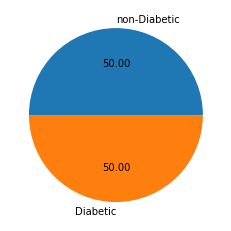

In [ ]:
#showing the numbers in a pie chart

labels=["non-Diabetic","Diabetic"]

plt.pie(df2["Diabetes_binary"].value_counts() , labels =labels ,autopct='%.02f' );

The pie chart shows that the data is balanced as the dataset is an already balanced dataset.



---



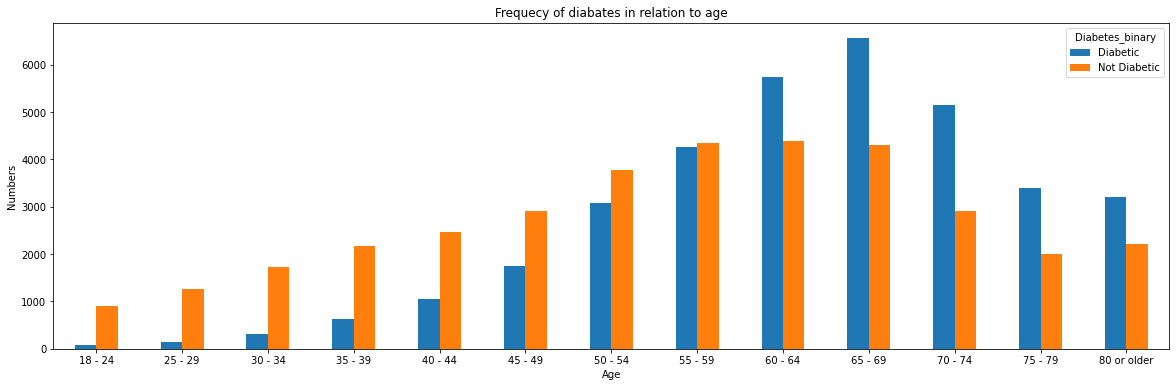

In [ ]:
#Age relation with diabetes binary
pd.crosstab(df2.Age,df2.Diabetes_binary).plot(kind="bar",figsize=(20,6))
plt.title('Frequecy of diabates in relation to age')
plt.xlabel('Age')
plt.xticks(rotation=0)
plt.ylabel('Numbers')
plt.show()

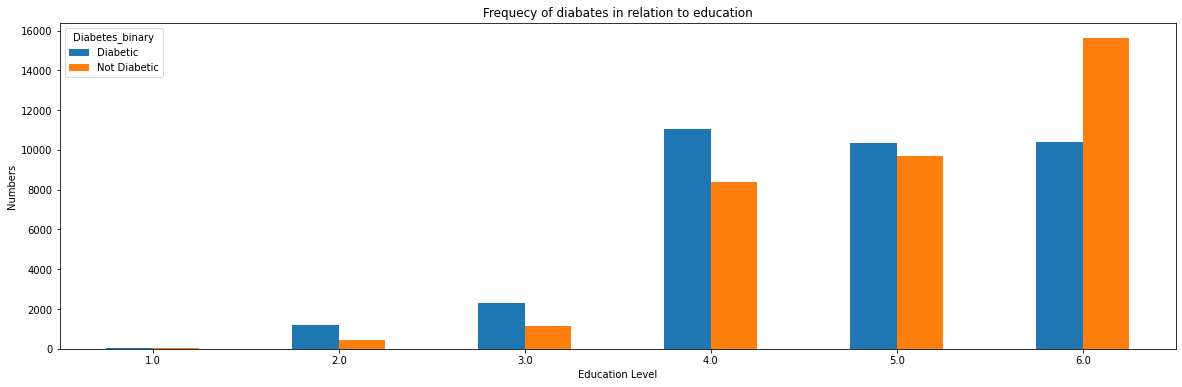

In [ ]:
#relation of education with diabetes
pd.crosstab(df.Education,df2.Diabetes_binary).plot(kind="bar",figsize=(20,6))
plt.title('Frequecy of diabates in relation to education')
plt.xlabel('Education Level')
plt.xticks(rotation=0)
plt.ylabel('Numbers')
plt.show()

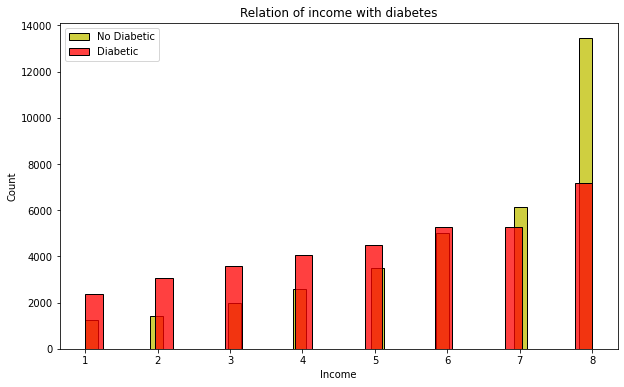

In [ ]:
#relation of income with diabetes
plt.figure(figsize=(10,6))


sns.histplot(df.Income[df.Diabetes_binary == 0], color="y", label="No Diabetic" )
sns.histplot(df.Income[df.Diabetes_binary == 1], color="r", label="Diabetic" )
plt.title("Relation of income with diabetes")

plt.legend()

In [ ]:
#see the relation of  BMI and diabetes
pd.crosstab(df2.BMI,df2.Diabetes_binary).plot(kind="bar",figsize=(40,8))
plt.title('Frequecy of diabates in relation to BMI')
plt.xlabel('BMI')
plt.xticks(rotation=0)
plt.ylabel('Numbers')
plt.show()



---



### Feature Selection

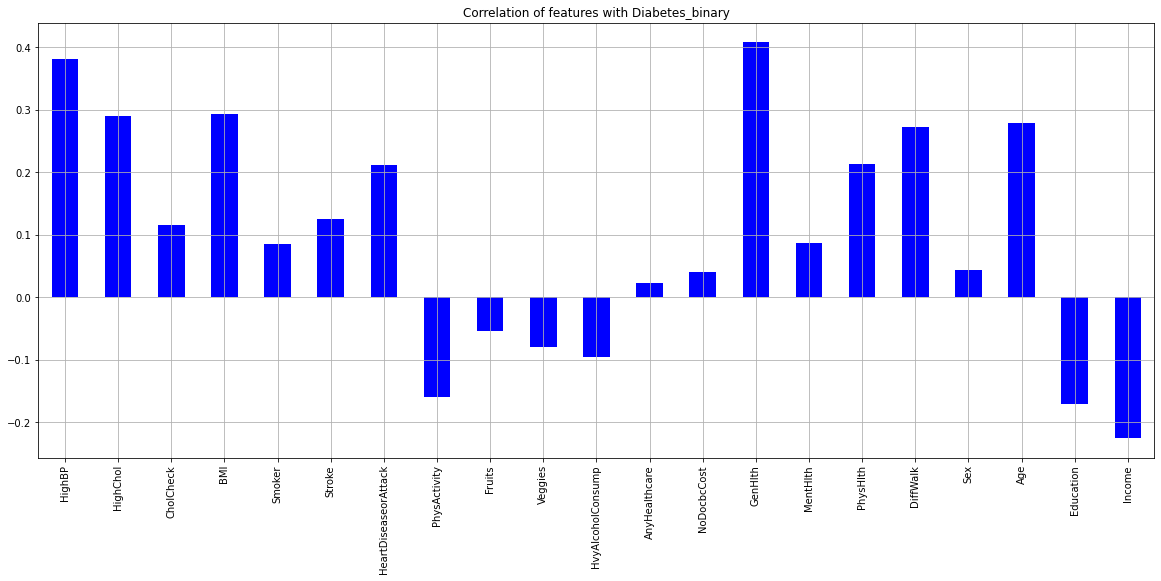

In [ ]:
# use bar graph to see the correlation of the features to diabete binary
df.drop('Diabetes_binary', axis=1).corrwith(df.Diabetes_binary).plot(kind='bar', grid=True, figsize=(20, 8)
, title="Correlation of features with Diabetes_binary",color="Blue");

In [ ]:
#use chi square to select best features
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X = df.iloc[:,1:]
Y = df.iloc[:,0]

feature_comparison = SelectKBest(score_func=chi2, k=10)
f = feature_comparison.fit(X,Y)

feature_scores = pd.DataFrame(f.scores_)
features = pd.DataFrame(X.columns)

#concatenating two dataframes for better visualization
f_Scores_table = pd.concat([features,feature_scores],axis=1)              
f_Scores_table.columns = ['Feature','Score']

f_Scores_table.sort_values(by=['Score'],ascending=False)

,Feature,Score
15,PhysHlth,55929.053254
3,BMI,10312.875795
14,MentHlth,9491.555258
18,Age,5204.869946
13,GenHlth,5133.529630
0,HighBP,4491.799960
16,DiffWalk,3926.865331
20,Income,2956.984221
1,HighChol,2804.501278
6,HeartDiseaseorAttack,2695.401378


Features with score lower than 100 will be removed. In this case, veggies, fruits, sex, cholcheck and anyhealth care will be removed as features.

In [ ]:
disqualified_features = ["Veggies" , "Fruits" , "Sex" , "CholCheck" , "AnyHealthcare" , "Diabetes_str"]

In [ ]:
df.drop(disqualified_features,axis= 1 ,inplace=True)